In [1]:
import tensorflow
from tensorflow import keras
import os
from glob import glob
import matplotlib.pyplot as plt
import albumentations as A

## Preprocessing

In [2]:
from imgaug import augmenters as iaa
from PIL import Image
import numpy as np

img_height = 256
img_width = 256

A_transforms = A.Compose([
    A.Resize(height=img_height, width=img_width)
])

iaa_transforms = iaa.Sequential([iaa.SaltAndPepper(0.3)])

<class 'numpy.ndarray'>


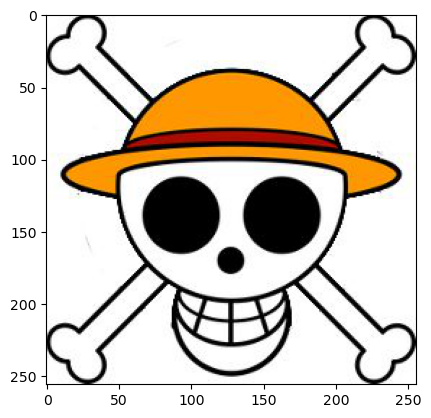

In [14]:
working_dir = "./images_parent/"
images_list = glob(working_dir + "images/*")

test_image = plt.imread(images_list[2])
print(type(test_image))
plt.imshow(test_image)

In [26]:
for image_name in images_list:
    base_name = os.path.basename(image_name)
    image = Image.open(image_name)
    image = np.array(image)
    image = A_transforms(image=image)
    
    image = image['image']
    image = iaa_transforms.augment_image(image=image)    
    
    image = Image.fromarray(image)
    save_path = r"./images_parent/images_mod/mod"
    image.save(save_path + base_name)


length of noised images 8
length of normal images 8
<class 'numpy.ndarray'>
Length of noised numpy array 8
Length of normal numpy array 8


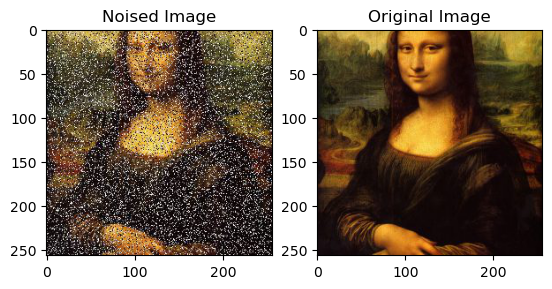

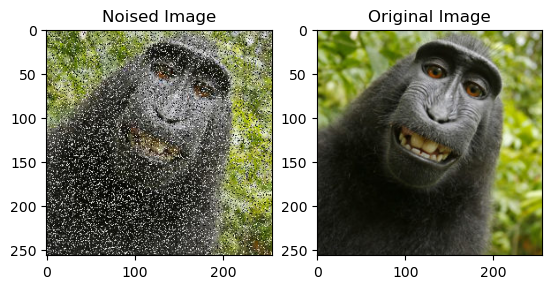

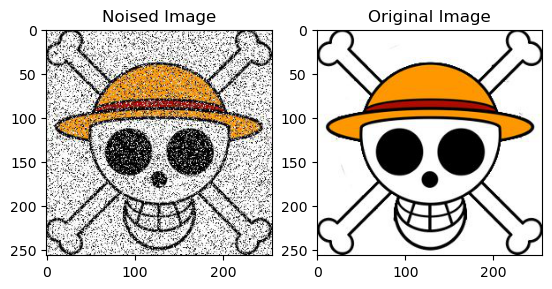

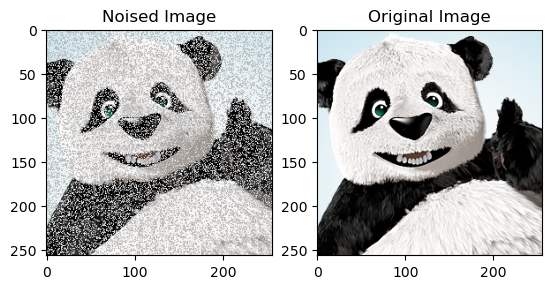

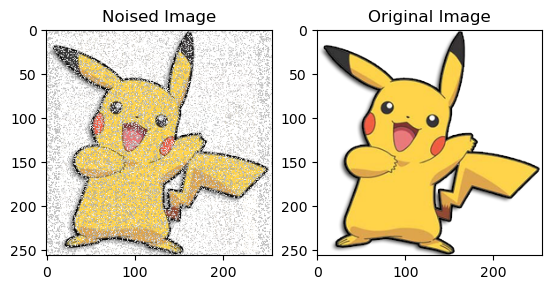

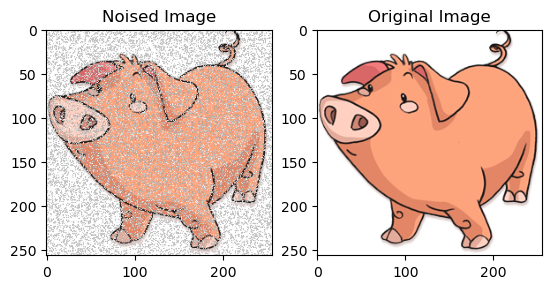

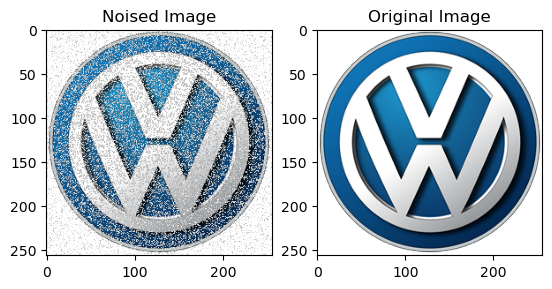

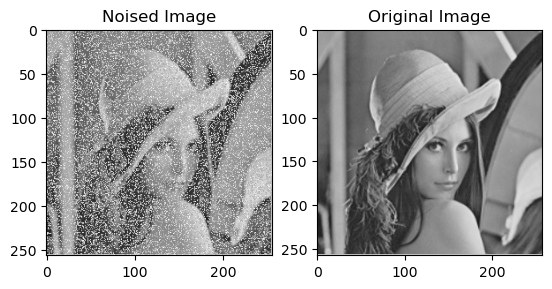

<Figure size 640x480 with 0 Axes>

In [44]:
noised_images = glob("./images_parent/images_mod/*")
normal_images = glob("./images_parent/images/*")

print(f"length of noised images {len(noised_images)}")
print(f"length of normal images {len(normal_images)}")

noised_images_input = []
normal_images_target = []

for i in range(min(len(noised_images), len(normal_images))):
    noised_image = plt.imread(noised_images[i]) ## numpy array
    normal_image = plt.imread(normal_images[i]) ## numpy array
    
    ## Saving images as numpy to list
    noised_images_input.append(noised_image)
    normal_images_target.append(normal_image)
    
    plt.subplot(1, 2, 1)
    plt.title("Noised Image")
    plt.imshow(noised_image)

    plt.subplot(1, 2, 2)
    plt.title("Original Image")
    plt.imshow(normal_image)
    
    plt.figure()
    
print(f"Length of noised numpy array {len(noised_images_input)}")
print(f"Length of normal numpy array {len(normal_images_target)}")

## Build Keras Dataset

In [ ]:
batch_size = 8

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(working_dir+"\images_parent", image_size=(img_height, img_width), batch_size=batch_size)
print(train_ds.class_names)